In [1]:
import os
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import imp 
import pickle

from utils.training_utils import to_rgb, calc_confusion, metrics_from_conf_matrix
from data.cityscapes.data_loader import loadFiles, map_labels_to_trainId
from evaluation.eval_cityscapes import calc_energy_distances, get_mode_statistics

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/utils/training_utils.py:21: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'nbAgg' by the following code:
  File "/usr/local/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/local/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/venv/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/venv/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/venv/lib/pytho

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/tmp/prob_unet_1.0beta_analyticKLTrue_6latents_31x1s_32chan_lr0.0001PieceWise_bs16_7blocks_QMeanFalse_henormal_noBiasReg_OneHotMinus0.5_240kepochs/munster_000062_000019_sample7_labelIds.npy


<IPython.core.display.Javascript object>


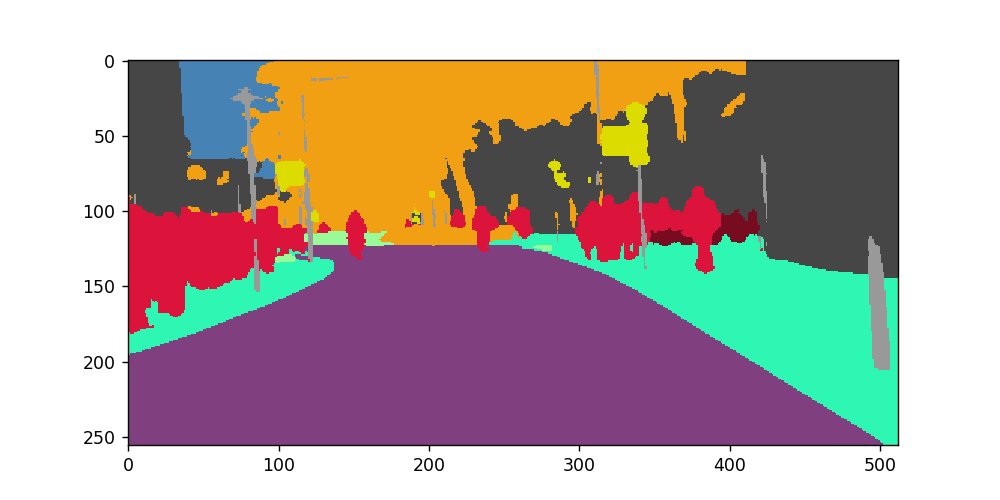

In [2]:
cf = imp.load_source('cf', 'cityscapes_eval_config.py')
path = cf.out_dir

ix = 18
img_path = os.path.join(path, os.listdir(path)[ix])
print(img_path)
img = np.load(img_path)

f = plt.figure(figsize=(8,4))
plt.imshow(to_rgb(img[0,0], cmap=cf.color_map))

# evaluate for different number of samples

In [3]:
results_file = os.path.join(cf.out_dir, 'eval_results.pkl')

with open(results_file, "rb") as f:
    results = pickle.load(f)

e_distances = []
e_means = []
samples_column = []
    
for s in [1,4,8,16]:
    e_dist = calc_energy_distances(results['d_matrices'], num_samples=s, probability_weighted=True, label_switches=cf.label_switches)
    e_dist = e_dist[~np.isnan(e_dist)]
    e_distances.extend(e_dist)
    samples_column.extend([s] * len(e_dist))
    e_means.append(np.mean(e_dist))

energy = pd.DataFrame(data={'energy': e_distances, 'num_samples': samples_column})
means = pd.DataFrame(data={'energy': e_means, 'num_samples': [1,4,8,16]})

/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/evaluation/eval_cityscapes.py:309: RuntimeWarning: Mean of empty slice
  mean_d_YY = np.nanmean(d_matrices['YY'], axis=-1)
/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/evaluation/eval_cityscapes.py:309: RuntimeWarning: Mean of empty slice
  mean_d_YY = np.nanmean(d_matrices['YY'], axis=-1)
/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/evaluation/eval_cityscapes.py:309: RuntimeWarning: Mean of empty slice
  mean_d_YY = np.nanmean(d_matrices['YY'], axis=-1)
/home/skohl/PycharmProjects/phabricator/skohl/prob_unet/evaluation/eval_cityscapes.py:309: RuntimeWarning: Mean of empty slice
  mean_d_YY = np.nanmean(d_matrices['YY'], axis=-1)


<IPython.core.display.Javascript object>


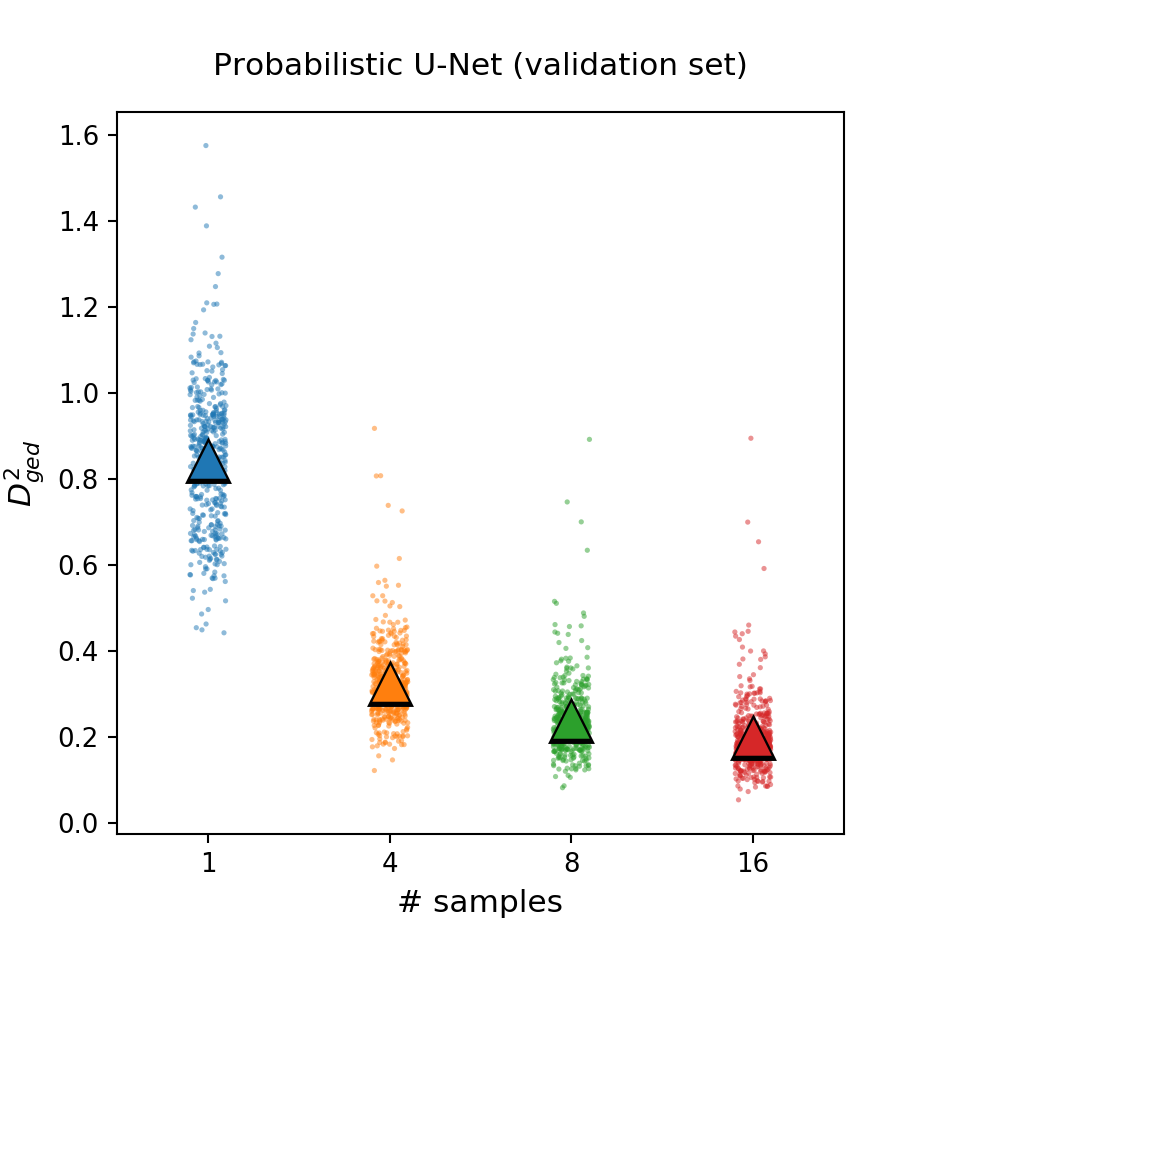

Text(0.5,0,'# samples')

In [26]:
f = plt.figure(figsize=(5,5), dpi=150)
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0,0])

sns.stripplot(x="num_samples", y="energy", data=energy, alpha=0.5, s=2, ax=ax)
sns.stripplot(x="num_samples", y="energy", data=means, s=18, marker='^', color='k', ax=ax, jitter=False)
sns.stripplot(x="num_samples", y="energy", data=means, s=14, marker='^', ax=ax, jitter=False)
ax.set_title('Probabilistic U-Net (validation set)', y=1.03)
fs=12
ax.set_ylabel(r'$D_{ged}^{2}$', fontsize=fs)
ax.set_xlabel('# samples', fontsize=fs)

In [5]:
print(results['pixel_frequencies'])
print(results['mode_frequencies'])

stats = get_mode_statistics(cf.label_switches, exp_modes=5)
print(sorted(stats['mode_probs']))

log_mode_frequencies = np.log(results['mode_frequencies'])
log_gt_mode_frequencies = np.log(stats['mode_probs'])

[[0.39207232 0.4350246 ]
 [0.44614304 0.31564506]
 [0.61882485 0.30369349]
 [0.72800224 0.20223276]
 [0.7578801  0.22053149]]
[0.163625 0.038375 0.036625 0.00875  0.06     0.0365   0.012375 0.00575
 0.065375 0.0125   0.02025  0.002375 0.024125 0.009625 0.007875 0.001875
 0.136125 0.03225  0.0425   0.006875 0.051125 0.032    0.01175  0.007
 0.0735   0.01125  0.03325  0.003125 0.02725  0.008625 0.014    0.003375]
[0.004732871, 0.0053244797, 0.0067612445, 0.0076063997, 0.00867693, 0.009761547, 0.011358891, 0.012395615, 0.012778752, 0.013945066, 0.015381831, 0.016226986, 0.01730456, 0.01825536, 0.020824632, 0.021974044, 0.023427712, 0.0247208, 0.028200023, 0.029749475, 0.031725027, 0.03346816, 0.036916394, 0.040285747, 0.041530944, 0.045321465, 0.052737705, 0.05932992, 0.06768005, 0.07614006, 0.09668579, 0.10877152]


<IPython.core.display.Javascript object>


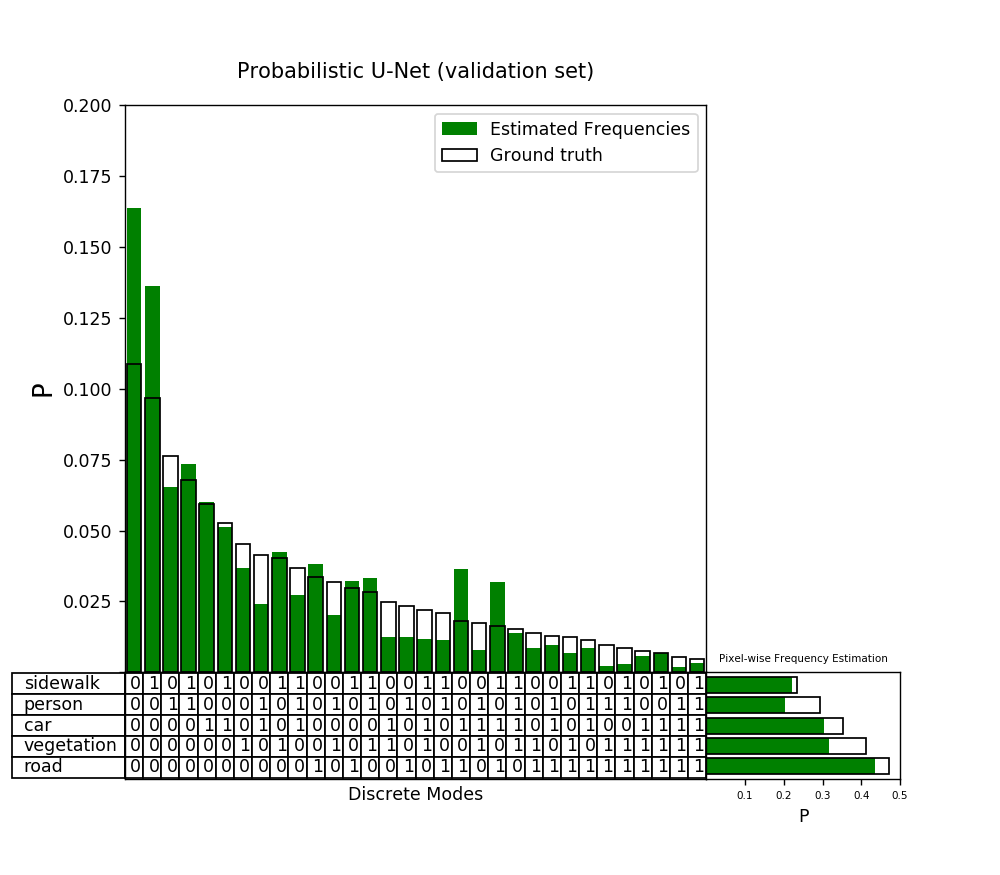

In [38]:
f = plt.figure(figsize=(8,7))
gs = gridspec.GridSpec(2, 2, wspace=0.0, hspace=0.0, height_ratios=[32,6], width_ratios=[3,1])

ax = plt.subplot(gs[0, 0])
sort_ixs = np.argsort(stats['mode_probs'])[::-1]
plt.bar(x=range(len(log_gt_mode_frequencies)), height=results['mode_frequencies'][sort_ixs], align='center', color='g', label='Estimated Frequencies')
plt.bar(x=range(len(log_gt_mode_frequencies)), height=stats['mode_probs'][sort_ixs], align='center', edgecolor='k', fc=(0,0,0,0), label='Ground truth')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax.legend()
ax.set_title('Probabilistic U-Net (validation set)', y=1.03)
ax = plt.gca()
ax.set_xlim([-.5,31.5])
ax.set_ylim([0,0.2])
yticks = ax.yaxis.get_major_ticks()
yticks[0].label1.set_visible(False)
ax.set_ylabel('P', fontdict={'size': 15})

rows = list(cf.label_switches.keys())
cell_text = np.transpose(stats['switch'][sort_ixs], axes=[1,0])

ax = plt.subplot(gs[1, 0])
the_table = ax.table(cellText=cell_text,
                      rowLabels=rows,
                      loc='center')

ax.get_yaxis().set_visible(False)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax.set_xlabel('Discrete Modes')

ax = plt.subplot(gs[1, 1])
ax.set_title('Pixel-wise Frequency Estimation',fontdict={'size': 6})
plt.barh(y=range(5), width=results['pixel_frequencies'][:,1], align='center', color='g')
plt.barh(y=range(5), width=list(cf.label_switches.values()), align='center', edgecolor='k', fc=(0,0,0,0))
ax.get_yaxis().set_visible(False)
ax.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax.set_xlabel('P')
ax.tick_params(axis='both', which='major', labelsize=6)

# prepare animated gif from samples

<IPython.core.display.Javascript object>


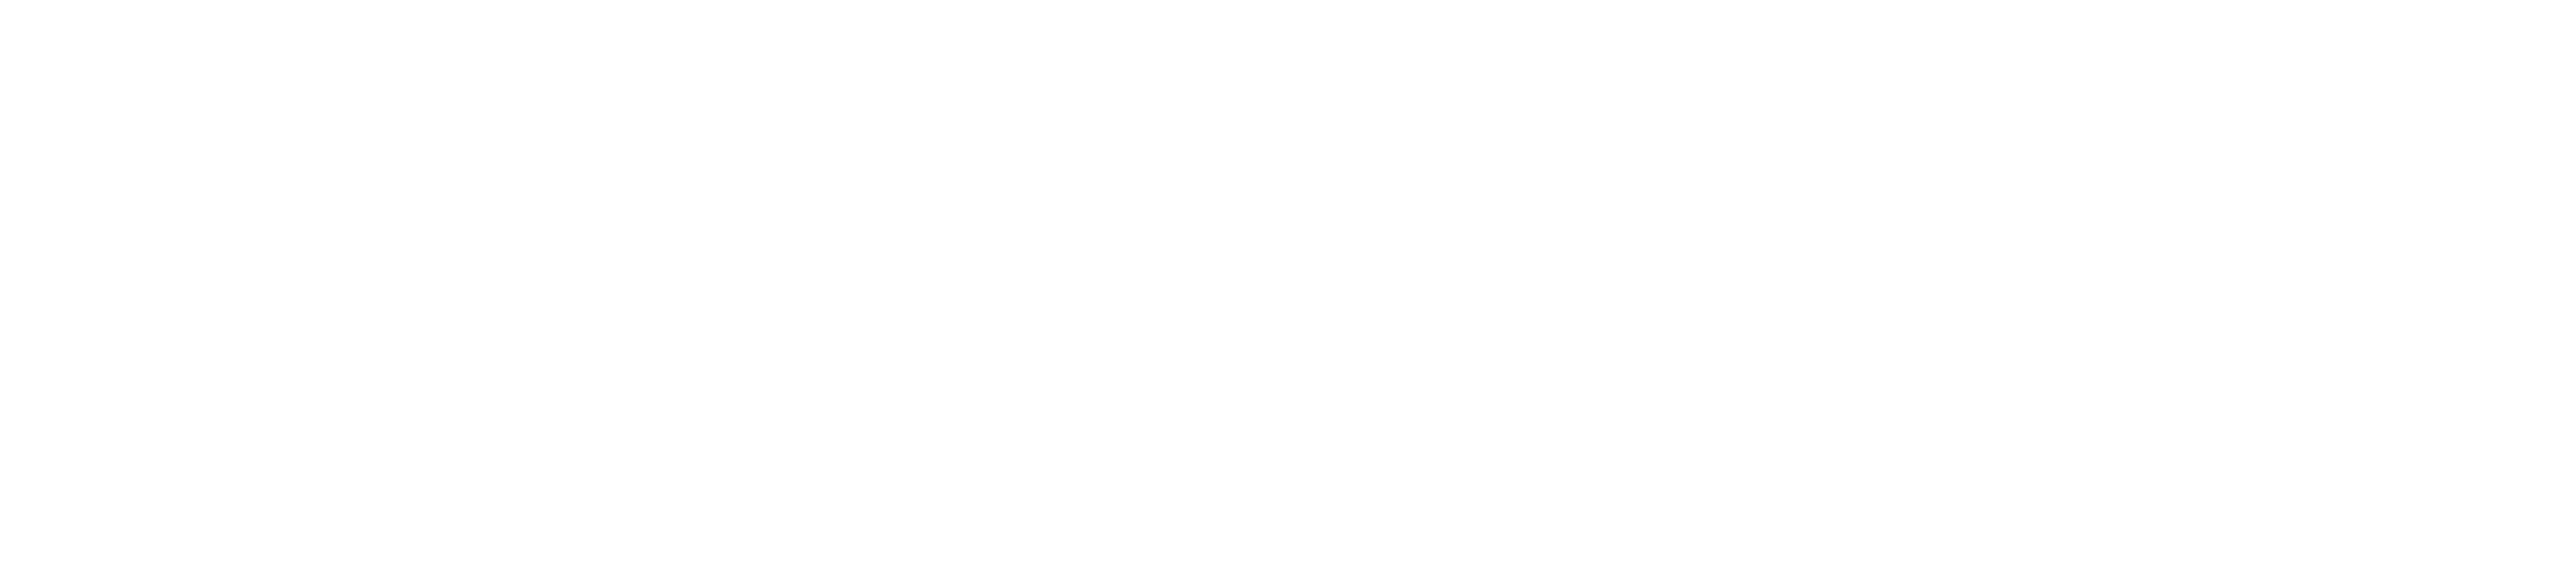

Saved to /home/skohl/PycharmProjects/phabricator/skohl/prob_unet/tmp//prob_unet_0.0005beta_analyticKLTrue_6latents_31x1s_32chan_lr0.0001PieceWise_bs16_7blocks_QMeanFalse_henormal_noBiasReg_OneHotMinus0.5_240kepochs_TFP/gif_panel_sample_0.png


<IPython.core.display.Javascript object>


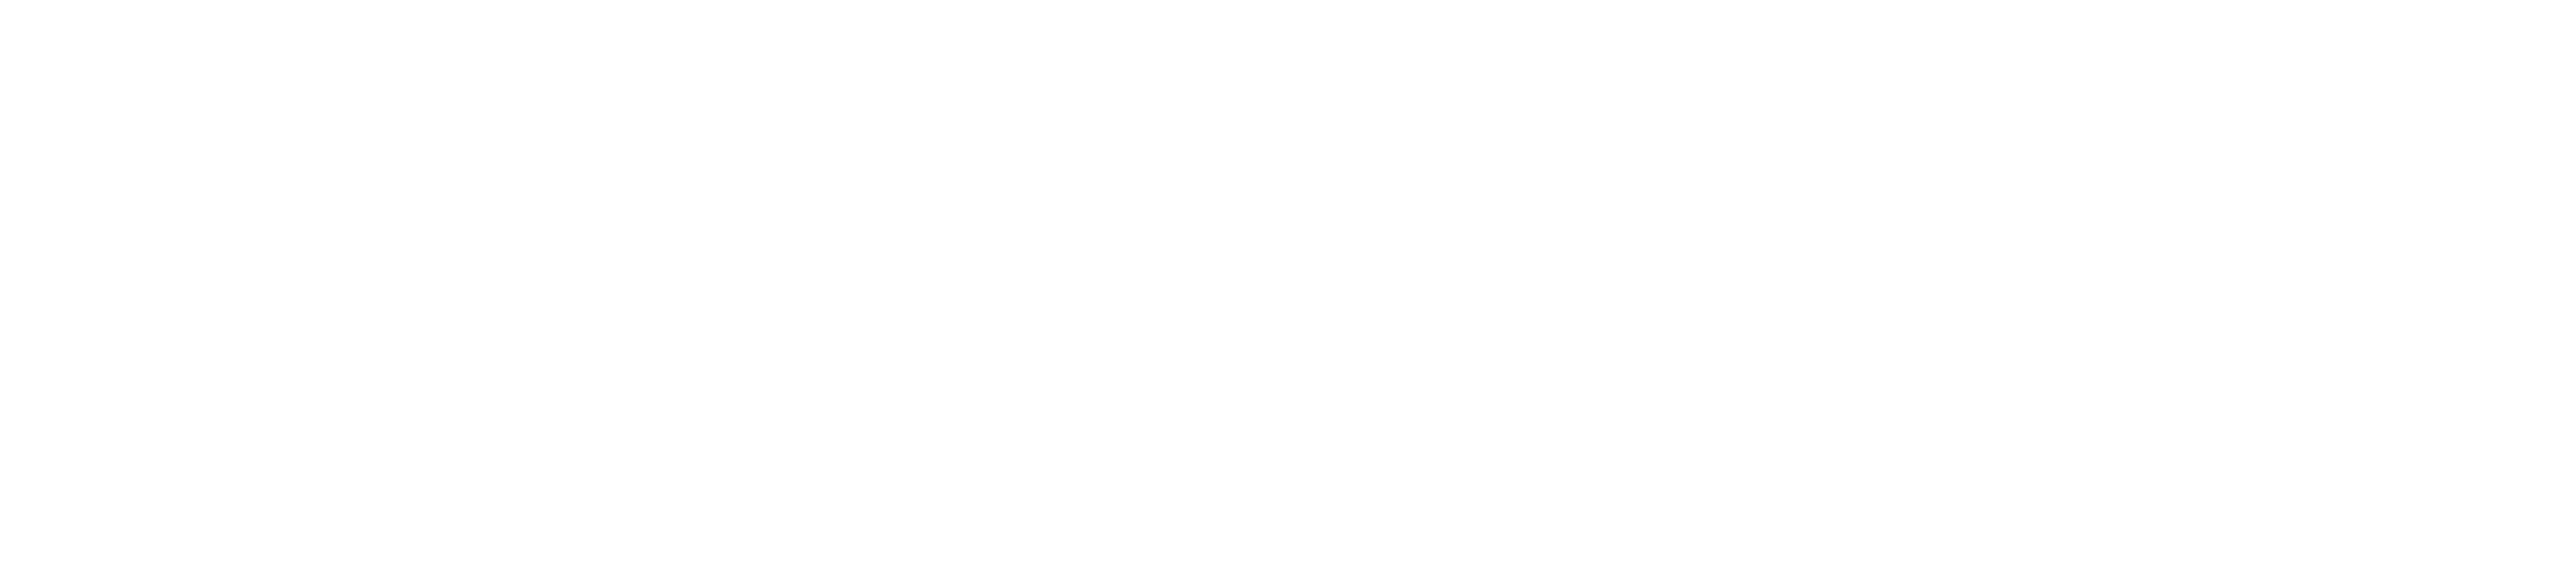

Saved to /home/skohl/PycharmProjects/phabricator/skohl/prob_unet/tmp//prob_unet_0.0005beta_analyticKLTrue_6latents_31x1s_32chan_lr0.0001PieceWise_bs16_7blocks_QMeanFalse_henormal_noBiasReg_OneHotMinus0.5_240kepochs_TFP/gif_panel_sample_1.png


<IPython.core.display.Javascript object>

KeyboardInterrupt: 

In [156]:
from matplotlib.lines import Line2D
from data.cityscapes.data_loader import map_labels_to_trainId

# get dictionary of image files
data_dir = os.path.join(cf.data_dir, cf.resolution)
data_dict = loadFiles(label_density=cf.label_density, split='val', input_path=data_dir,
                      cities=None, instance=False)

# list of image indices in data_dict
ixs = [0,2,75,85,100,145,350,390,460,470]
num_samples = 16
y_dim = 256
x_dim = 512

img_arr = np.zeros(shape=(y_dim, len(ixs) * x_dim, 3)) 
gt_arr = np.zeros(shape=(y_dim, len(ixs) * x_dim))
sample_arr = np.zeros(shape=(num_samples, y_dim, len(ixs) * x_dim))

for i,ix in enumerate(ixs):

    img_key = list(data_dict.keys())[ix]
    img_path = data_dict[img_key]['data']
    seg_path = data_dict[img_key]['seg']
    
    # load images
    img_arr[:, i * x_dim: (i + 1) * x_dim] = np.transpose(np.load(img_path), axes=[1,2,0]) / 255.
    
    # load gt segmentation
    gt_arr[:, i * x_dim: (i + 1) * x_dim] = map_labels_to_trainId(np.load(seg_path))
    
    # load samples
    for sample_num in range(num_samples):
        sample_path = os.path.join(cf.out_dir, '{}_sample{}_labelIds.npy'.format(img_key, sample_num))
        sample_arr[sample_num, :, i * x_dim: (i + 1) * x_dim] = np.load(sample_path)[0,0]

for sample_num in range(num_samples):
    f = plt.figure(figsize=(len(ixs) * 4, 9))

    arr = np.concatenate([img_arr, to_rgb(gt_arr, cmap=cf.color_map), to_rgb(sample_arr[sample_num], cmap=cf.color_map)], axis=0)
    
    plt.imshow(arr)
    plt.text(-80,170, 'image', fontsize=12, rotation=90, rotation_mode='anchor')
    plt.text(-80,470, 'deterministic', fontsize=12, rotation=90, rotation_mode='anchor')
    plt.text(-40,460, 'groundtruth', fontsize=12, rotation=90, rotation_mode='anchor')
    plt.text(-80,690, 'sample {}'.format(sample_num + 1), fontsize=12, rotation=90, rotation_mode='anchor')
    
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # custom legend
    trainId2name = cf.trainId2name
    trainId2name[255] = 'ignore'
    legend_handles = [Line2D([0], [0], color=tuple([c / 255. for c in cf.color_map[trainID]]), lw=4, label=trainId2name[trainID]) for trainID in list(cf.color_map.keys())]   
    ax.legend(handles=legend_handles, loc=9, bbox_to_anchor=(0.5, -0.03), ncol=len(legend_handles), frameon=False)
    out_dir = os.path.join(cf.out_dir, 'gif_panel_sample_{}.png'.format(sample_num))
    plt.savefig(out_dir, dpi=200, bbox_inches='tight', pad_inches=0.0)
    plt.close()
    print('Saved to {}'.format(out_dir))